In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

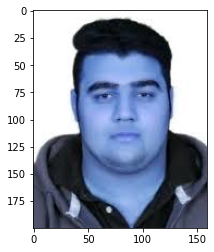

In [2]:
img = cv2.imread('imran.jpg')
plt.imshow(img)

In [3]:
# 3 is for RGB channel
img.shape

(200, 160, 3)

# Haar Cascade for facial detection working with Gray Scale
**So we need to convert image into gray color**

In [4]:
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray.shape
# as in case of gray, we have only one color so here we don't have 3

(200, 160)

In [5]:
gray

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [ 93,  93,  92, ...,  94,  94,  94],
       [ 93,  93,  92, ...,  94,  94,  94],
       [ 93,  93,  92, ...,  94,  94,  94]], dtype=uint8)

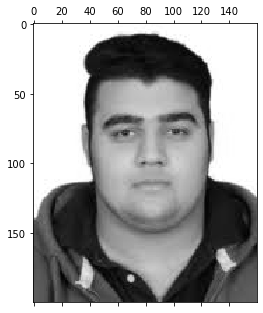

In [6]:
# cmap will convert it into gray color
plt.matshow(gray, cmap = 'gray')

# openCV2 already provided some pretained models, so here we are using two of them one for face and second for eyes detection..
**For using we need to download the raw files and paste it into our projects**

In [7]:
face_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_eye.xml')

# for detection, we need to use the detectMultiScale fn
# this fn gives us the 4 numbers, first is x, second is y and third and fourth one are height and width

In [8]:
faces = face_cascade.detectMultiScale(gray,1.3,5)
faces

array([[ 34,  38, 100, 100]])

In [9]:
(x,y,h,w) = faces[0]
x,y,h,w

(34, 38, 100, 100)

# We want to display rectangle along the face detected by the detectMultiScale fn

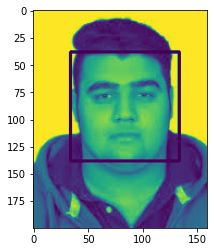

In [10]:
# second last param = color of the rectangle
# last param is the thickness of the rectangle
face_img = cv2.rectangle(gray, (x,y), (x+w, y+h),(0,0,255), 2 )
plt.imshow(face_img)

In [11]:
# This Fn destory all the windows that are created 
cv2.destroyAllWindows()

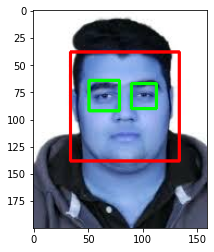

In [12]:
# Got this fancy code from Open CV Websites
for x,y,h,w in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    # roi_color is the face image with rectangle
    roi_color = face_img[y:y+h, x:x+w]
    # we are detecting eyes from the rectangle img of the face
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

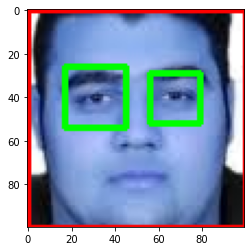

In [13]:
plt.imshow(roi_color, cmap = 'gray')

In [14]:
cropped_image = np.array(roi_color)
cropped_image.shape

(100, 100, 3)

# As we also need to classify the images, so we need some feature extraction so that we can classify different images


**For that purpose we will use Wavelet fn to extract features from the images**

In [15]:
import pywt
def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

# Here the image for more feature Extraction

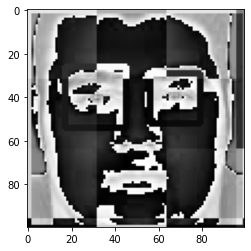

In [16]:
im_har = w2d(cropped_image,'db1',5)
plt.imshow(im_har, cmap='gray')

#### You can see above a wavelet transformed image that gives clues on facial features such as eyes, nose, lips etc. This along with raw pixel image can be used as an input for our classifier

In [17]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

In [18]:
def get_cropped_images_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray,1.3,5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y: y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        # this will return images only if the eyes are detected
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

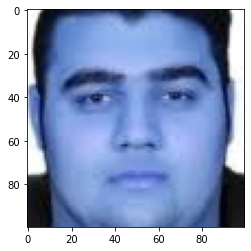

In [19]:
cropped_images = get_cropped_images_if_2_eyes('imran.jpg')
plt.imshow(cropped_images)

# In the Given pictures, eyes are not get detected so we are getting noting in the output when we call the fn

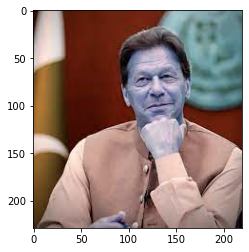

In [20]:
img2 = cv2.imread('imran1.jpg')
plt.imshow(img2)

In [21]:
cropped_images = get_cropped_images_if_2_eyes('imran1.jpg')
cropped_images

**Above cropped_image_no_2_eyes is None which means we should ignore this image and we will not use such image for model training**

## Now we need to perform this operation with all our dataset and get cropped images as an output which we will furthur use for our models

In [22]:
path_to_data = "./dataset/"
path_to_cr_data = "./dataset/cropped/"

In [23]:
import os

In [24]:
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [25]:
img_dirs

['./dataset/cropped',
 './dataset/lionel_messi',
 './dataset/maria_sharapova',
 './dataset/roger_federer',
 './dataset/serena_williams',
 './dataset/virat_kohli']

In [26]:
import shutil
if os.path.exists(path_to_cr_data):
    shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)    

In [27]:
cropped_image_dirs = []
celebrity_file_names_dict = {}
for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    celebrity_file_names_dict[celebrity_name] = []
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name
            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1

Generating cropped images in folder:  ./dataset/cropped/lionel_messi
Generating cropped images in folder:  ./dataset/cropped/maria_sharapova
Generating cropped images in folder:  ./dataset/cropped/roger_federer
Generating cropped images in folder:  ./dataset/cropped/serena_williams
Generating cropped images in folder:  ./dataset/cropped/virat_kohli


### Now you should have cropped folder under datasets folder that contains cropped images
### Manually examine cropped folder and delete any unwanted images
**As we delete some manually pictures so we need to index them again in order to iterate properly**

# Again we will be working on our dictionary file

In [47]:
celebrity_file_names_dict = {}
for img_dir in cropped_image_dirs:
    img_list = []
    celebrity_name = img_dir.split('/')[-1]
    for entry in os.scandir(img_dir):
        img_list.append(entry.path)
    celebrity_file_names_dict[celebrity_name] = img_list

celebrity_file_names_dict    

{'lionel_messi': ['./dataset/cropped/lionel_messi\\lionel_messi1.png',
  './dataset/cropped/lionel_messi\\lionel_messi10.png',
  './dataset/cropped/lionel_messi\\lionel_messi11.png',
  './dataset/cropped/lionel_messi\\lionel_messi12.png',
  './dataset/cropped/lionel_messi\\lionel_messi13.png',
  './dataset/cropped/lionel_messi\\lionel_messi14.png',
  './dataset/cropped/lionel_messi\\lionel_messi15.png',
  './dataset/cropped/lionel_messi\\lionel_messi16.png',
  './dataset/cropped/lionel_messi\\lionel_messi17.png',
  './dataset/cropped/lionel_messi\\lionel_messi18.png',
  './dataset/cropped/lionel_messi\\lionel_messi19.png',
  './dataset/cropped/lionel_messi\\lionel_messi2.png',
  './dataset/cropped/lionel_messi\\lionel_messi20.png',
  './dataset/cropped/lionel_messi\\lionel_messi22.png',
  './dataset/cropped/lionel_messi\\lionel_messi23.png',
  './dataset/cropped/lionel_messi\\lionel_messi24.png',
  './dataset/cropped/lionel_messi\\lionel_messi25.png',
  './dataset/cropped/lionel_messi\

# Now we will assign the number to each celebrity

In [48]:
class_dict = {}
count = 0
for name in celebrity_file_names_dict.keys():
    class_dict[name] = count 
    count+=1
class_dict 

{'lionel_messi': 0,
 'maria_sharapova': 1,
 'roger_federer': 2,
 'serena_williams': 3,
 'virat_kohli': 4}

### Images in cropped folder can be used for model training. We will use these raw images along with wavelet transformed images to train our classifier. Let's prepare X and y now

In [49]:
x ,y = [], []
for celebrity, trained_img in celebrity_file_names_dict.items():
    # as trained_img is the list of all images so we need to iterate throw it too
    for training_img in trained_img:
        img = cv2.imread(training_img)
        resized_img = cv2.resize(img, (32,32))
        img_har = w2d(img, 'db1', 5)
        har_resized_img = cv2.resize(img_har,(32,32))
        # we want to use both pictures features for better predictions
        # actuall + har image 
        # so we will stack them vertically, we will be using a numpy fn vstack
        combined_img = np.vstack((resized_img.reshape(32*32*3,1),har_resized_img.reshape(32*32,1)))
        x.append(combined_img)
        y.append(class_dict[celebrity])       

In [50]:
x[0].shape

(4096, 1)

In [51]:
# it's the size actuall and har raw picture combined (3 is for rgb)
32*32*3 + 32*32

4096

In [52]:
x[0]

array([[100],
       [129],
       [140],
       ...,
       [237],
       [234],
       [232]], dtype=uint8)

In [53]:
len(x)

161

# Here we x in list and also in integer numbers so wo better prediction we are going to convert it into array with float as a type 

In [54]:
X = np.array(x).reshape(len(x),4096).astype(float)
X.shape

(161, 4096)

In [55]:
X[0]

array([100., 129., 140., ..., 237., 234., 232.])

# Here We are going to Start creating Models

In [56]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [62]:
x_train, x_test,y_train,y_test = train_test_split(X,y, random_state = 0, train_size = 0.8)

In [63]:
x_train.shape

(128, 4096)

In [64]:
pipe = Pipeline([('scaler', StandardScaler()),('scv', SVC(kernel = 'rbf',C = 10))])

In [65]:
pipe.fit(x_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('scv', SVC(C=10))])

In [66]:
pipe.score(x_test,y_test)

0.9393939393939394

# For Hyperparameter Checking now use other models too

In [67]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [68]:
model_params = {
    'svm':{
        'model': svm.SVC(gamma = 'auto', probability = True),
        'params':{
            'svc__C':[1,10,100,100],
            'svc__kernel':['linear', 'rbf']
        }
    },
    'logistic_Regression':{
        'model':LogisticRegression(solver = 'liblinear', multi_class = 'auto'),
        'params':{
            'logisticregression__C':[1,5,10]
        }
    },
    'Random_Forest':{
        'model': RandomForestClassifier(),
        'params':{
            'randomforestclassifiern_estimateors':[1,5,10]
        }
    }
}

In [69]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [70]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(x_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.852000,"{'svc__C': 10, 'svc__kernel': 'rbf'}"
1,random_forest,0.702769,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.867077,{'logisticregression__C': 1}


In [73]:
! pip install joblib
import joblib
joblib.dump(pipe, 'model.pkl')

['model.pkl']

In [75]:
import json
with open('dict.json', 'w')as f:
    f.write(json.dumps(class_dict))